<a href="https://colab.research.google.com/github/yadukrishnanp2001/FASHION-MNIST-/blob/main/MNIST_Fasion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Angle boot']

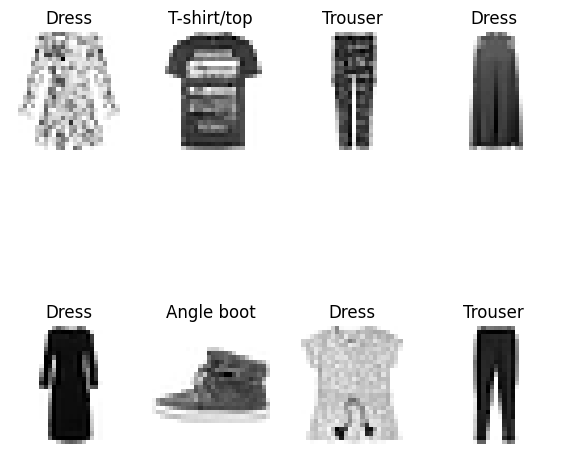

In [5]:
import random
plt.figure(figsize=(7, 7))
for i in range(8):
    plt.subplot(2,4, i+1)
    rand_index = random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[y_train[rand_index]])
    plt.axis(False)

In [6]:
X_train.min(), X_train.max()

(0, 255)

In [7]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [8]:
X_train_scaled.min(), X_train_scaled.max(), X_test_scaled.min(), X_test_scaled.max()

(0.0, 1.0, 0.0, 1.0)

In [9]:
X_train[0].shape

(28, 28)

In [10]:
len(class_names)

10

In [11]:
# Model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=15,
                    validation_data=(X_test_scaled,y_test))

Epoch 1/15
1875/1875 [==============================] - 18s 5ms/step - loss: 0.4828 - accuracy: 0.8243 - val_loss: 0.3540 - val_accuracy: 0.8756
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3164 - accuracy: 0.8842 - val_loss: 0.3716 - val_accuracy: 0.8622
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2740 - accuracy: 0.8982 - val_loss: 0.2992 - val_accuracy: 0.8928
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2439 - accuracy: 0.9097 - val_loss: 0.2756 - val_accuracy: 0.8998
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2225 - accuracy: 0.9175 - val_loss: 0.2701 - val_accuracy: 0.9009
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2014 - accuracy: 0.9244 - val_loss: 0.3089 - val_accuracy: 0.8888
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1830 - accuracy: 0.9319 - val_loss: 0.2613 - val_accuracy

<Axes: >

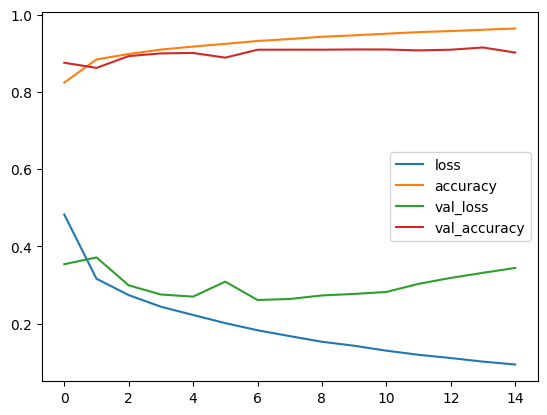

In [12]:
pd.DataFrame(history.history).plot()

In [13]:
y_probs = model.predict(X_test_scaled)
y_probs

313/313 [==============================] - 1s 2ms/step


array([[1.0356441e-08, 3.0095787e-11, 5.5025806e-10, ..., 3.3234821e-05,
        1.8605281e-11, 9.9996674e-01],
       [4.0177917e-10, 4.7510245e-24, 1.0000000e+00, ..., 1.2195523e-20,
        5.1433611e-15, 1.1994290e-17],
       [3.4242378e-26, 1.0000000e+00, 6.2647395e-32, ..., 4.9417287e-34,
        4.1825055e-33, 7.4801419e-32],
       ...,
       [3.2290995e-22, 1.8290703e-33, 7.7409450e-23, ..., 2.7925023e-25,
        1.0000000e+00, 1.9821014e-24],
       [1.6195280e-17, 1.0000000e+00, 2.1559280e-18, ..., 3.1258591e-23,
        6.1041173e-23, 5.5774772e-19],
       [2.3117435e-13, 2.2800699e-17, 4.1793817e-09, ..., 2.4485811e-07,
        1.0120095e-11, 8.4638661e-09]], dtype=float32)

In [14]:
y_pred = y_probs.argmax(axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [15]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [16]:
print('Accuracy:',accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Accuracy: 90.2
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.89      0.85      1000
           3       0.91      0.87      0.89      1000
           4       0.89      0.81      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.74      0.74      0.74      1000
           7       0.94      0.96      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



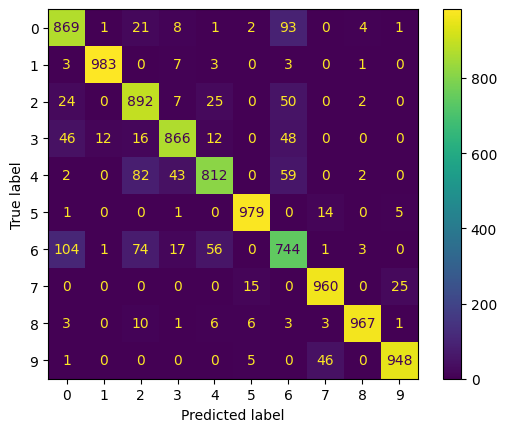

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [18]:
import random

def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))

    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    # changing color of the title depending on the prediction right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color='red'

    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,100*tf.reduce_max(pred_probs),true_label),color=color)

1/1 [==============================] - 0s 178ms/step


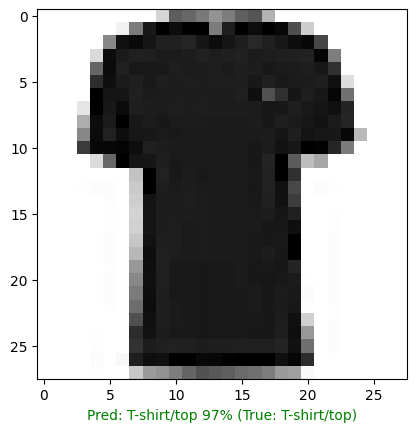

In [19]:
plot_random_image(model=model, images=X_test_scaled, true_labels=y_test, classes=class_names)

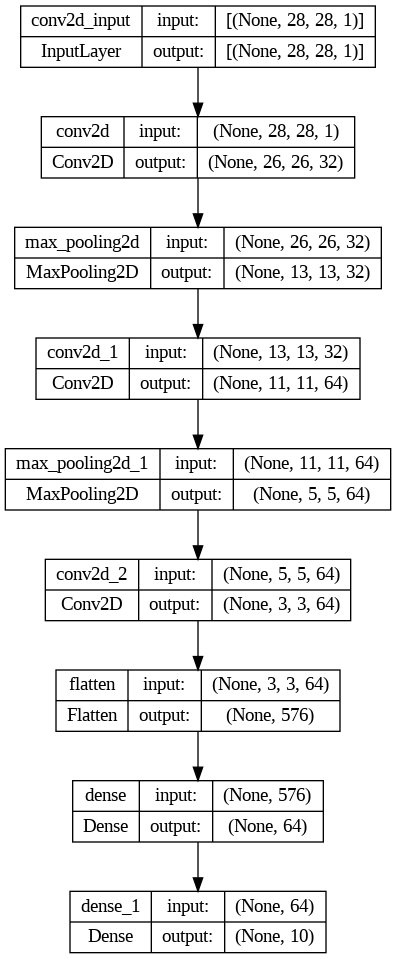

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)